In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [121]:
data = pd.read_csv('Curstomer_Chrun.csv')

Inspect dataset

In [122]:
print("Dataset Shape:", data.shape)
print(data.info())
data.head()

Dataset Shape: (360, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        360 non-null    object 
 1   gender            360 non-null    object 
 2   SeniorCitizen     360 non-null    int64  
 3   Partner           360 non-null    object 
 4   Dependents        360 non-null    object 
 5   tenure            360 non-null    int64  
 6   PhoneService      360 non-null    object 
 7   MultipleLines     360 non-null    object 
 8   InternetService   360 non-null    object 
 9   OnlineSecurity    360 non-null    object 
 10  OnlineBackup      360 non-null    object 
 11  DeviceProtection  360 non-null    object 
 12  TechSupport       360 non-null    object 
 13  StreamingTV       360 non-null    object 
 14  StreamingMovies   360 non-null    object 
 15  Contract          360 non-null    object 
 16  PaperlessBilling  3

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [123]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,360.000000,360.000000,360.000000,360.000000
mean,0.169444,31.477778,65.810417,2204.427500
std,0.375666,24.544759,29.231232,2174.740212
min,0.000000,1.000000,18.950000,19.250000
25%,0.000000,8.000000,44.537500,419.487500
50%,0.000000,27.500000,71.025000,1333.975000
75%,0.000000,53.000000,89.850000,3553.350000
max,1.000000,72.000000,115.100000,8129.300000


Target variable: Churn

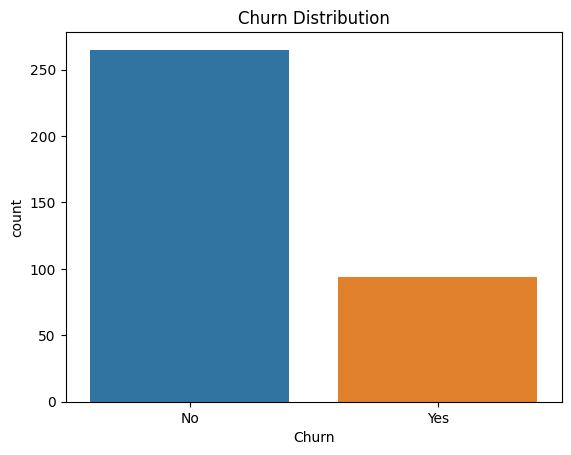

In [124]:
sns.countplot(x='Churn', data=data)
plt.title("Churn Distribution")
plt.show()

Percentage distribution

In [125]:
churn_rate = data['Churn'].value_counts(normalize=True) * 100
print("Churn Rate:\n", churn_rate)

Churn Rate:
 No     73.816156
Yes    26.183844
Name: Churn, dtype: float64


Check for missing value

In [126]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               1
dtype: int64

In [127]:
data.dropna(subset=['Churn'], inplace=True)
data['Churn'].fillna(data['Churn'].mode()[0], inplace=True)
print(data.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [128]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [129]:
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

Data Exploration

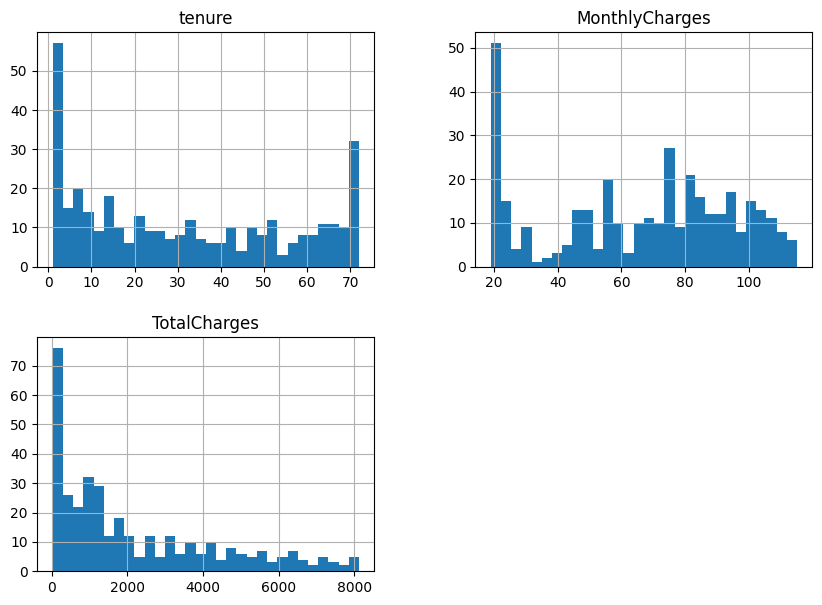

In [130]:
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[num_features].hist(bins=30, figsize=(10, 7))
plt.show()

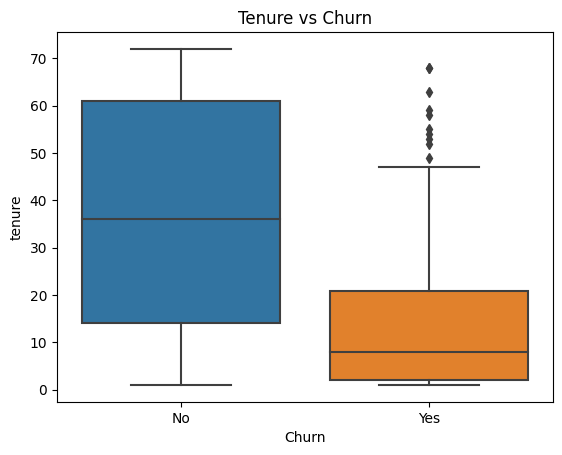

In [131]:
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title("Tenure vs Churn")
plt.show()

Outliers Removal

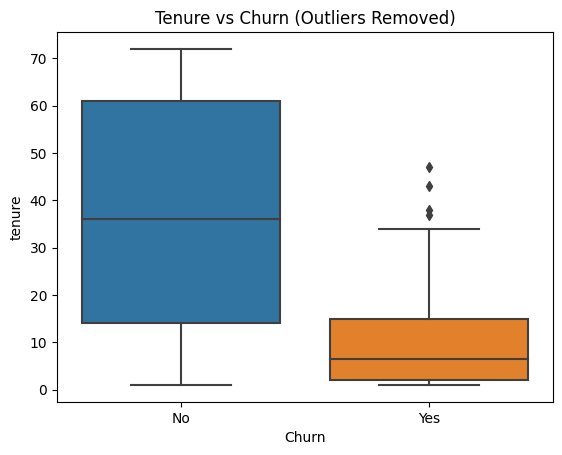

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_filtered

data_filtered = data.copy()
for churn_value in data['Churn'].unique():
  temp_df = data[data['Churn'] == churn_value]
  temp_df_filtered = remove_outliers_iqr(temp_df, 'tenure')
  data_filtered = pd.concat([data_filtered[data_filtered['Churn'] != churn_value], temp_df_filtered])

sns.boxplot(x='Churn', y='tenure', data=data_filtered)
plt.title("Tenure vs Churn (Outliers Removed)")
plt.show()


In [133]:
data = data_filtered

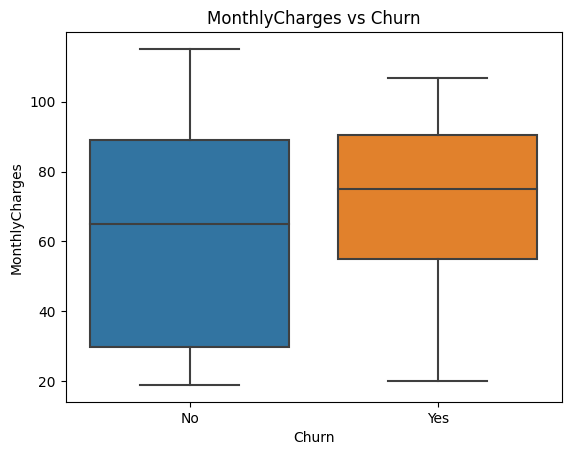

In [134]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title("MonthlyCharges vs Churn")
plt.show()

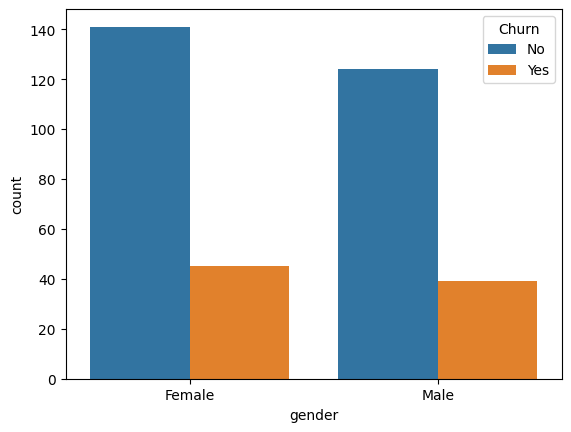

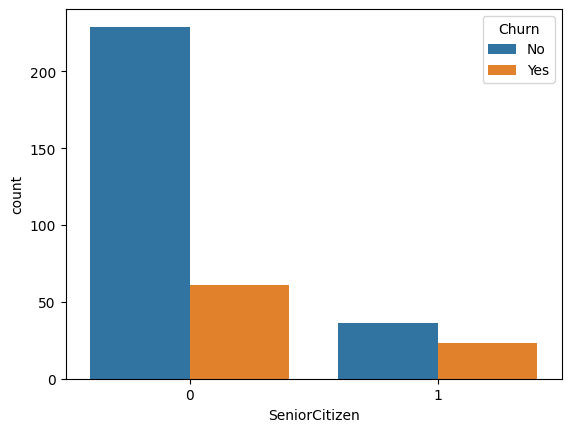

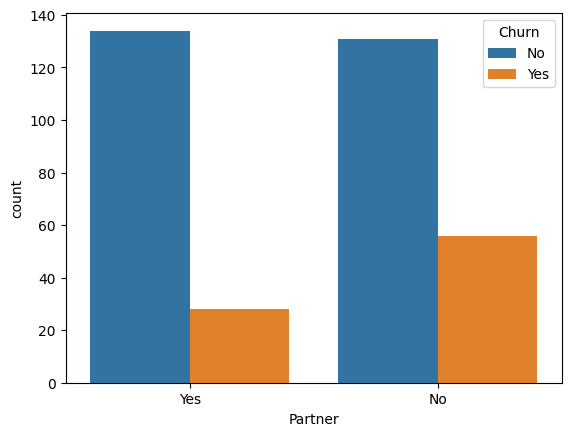

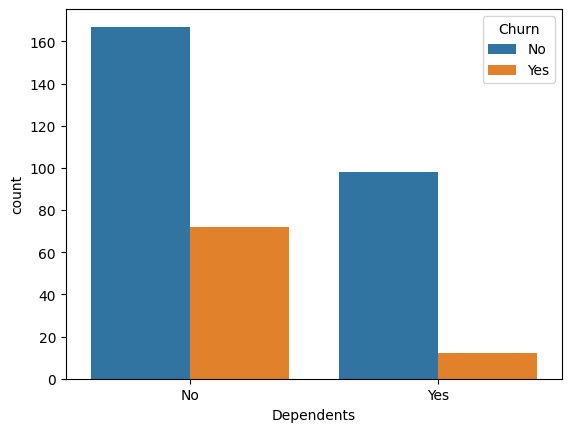

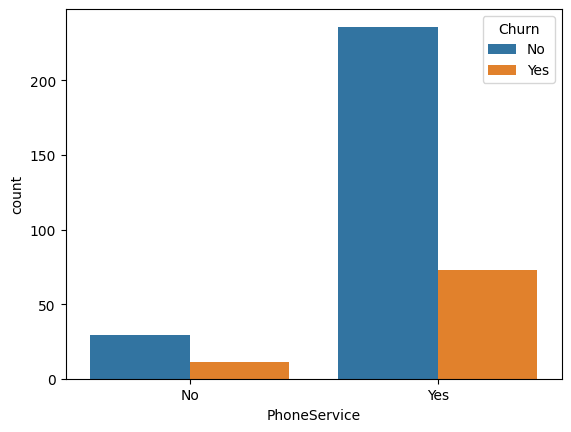

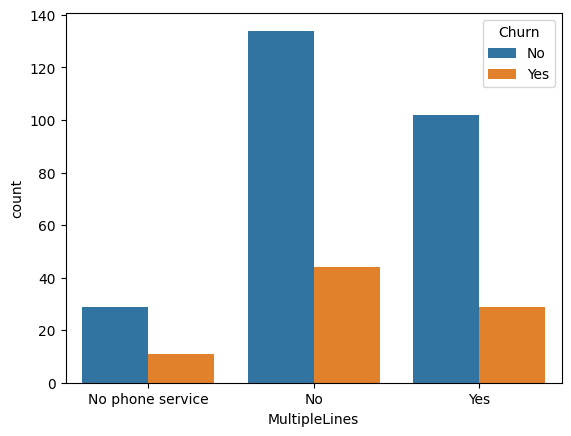

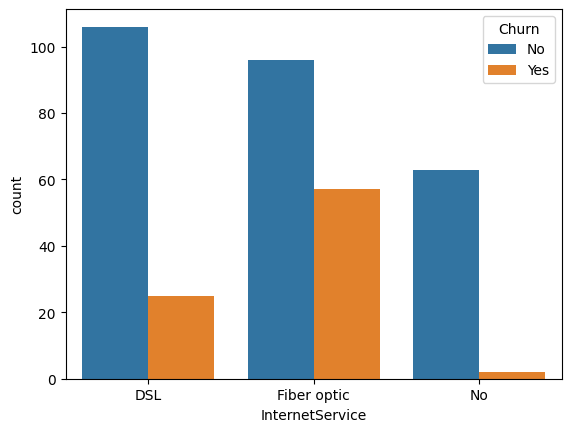

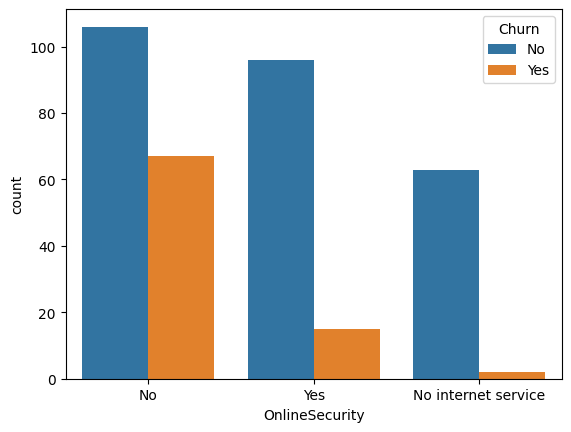

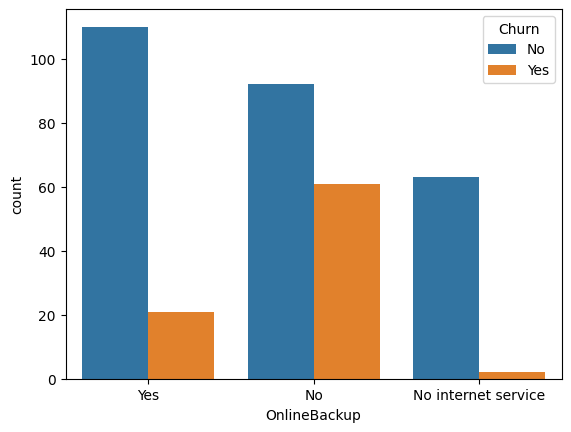

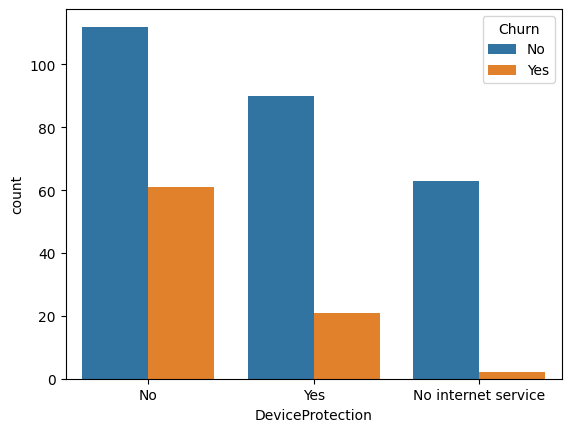

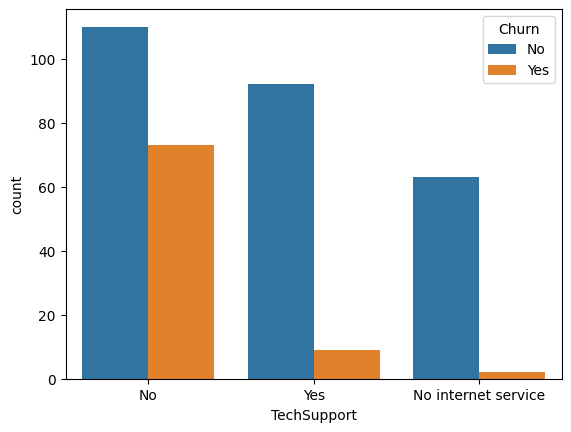

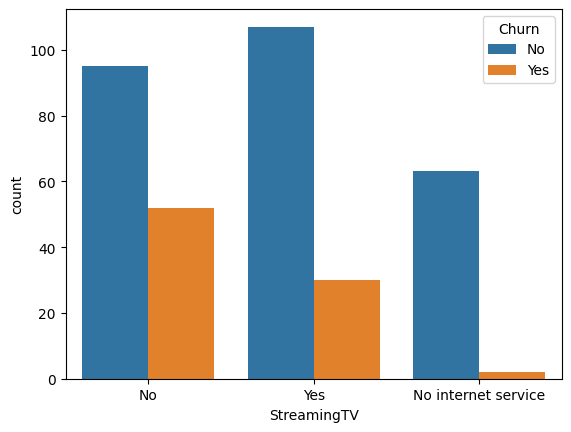

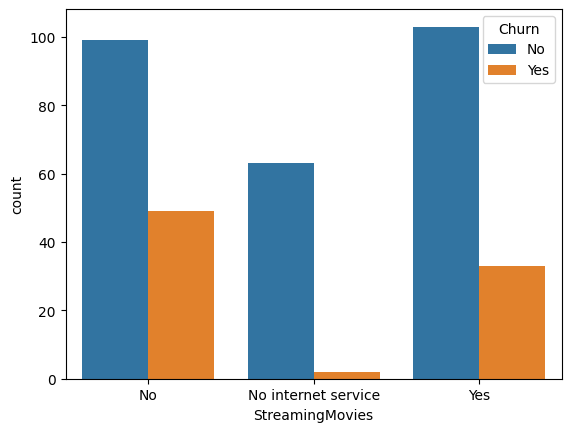

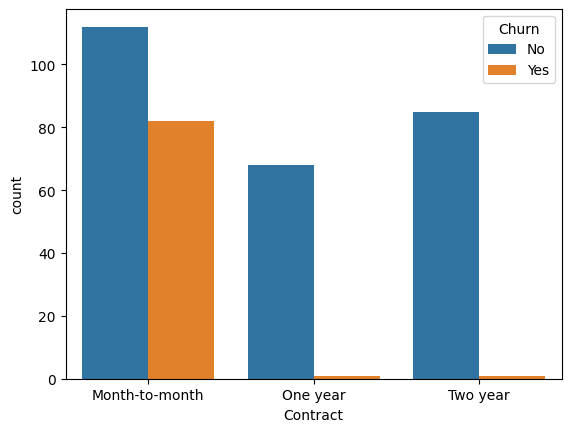

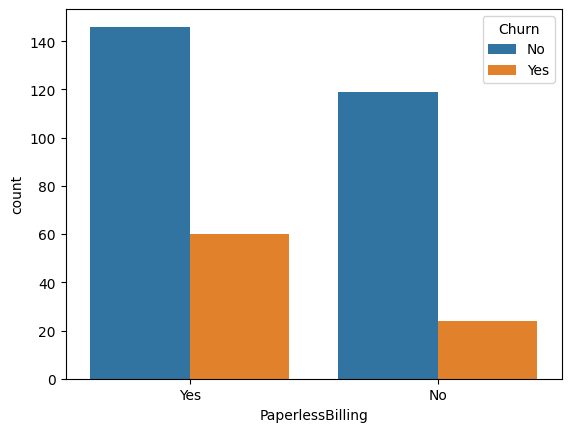

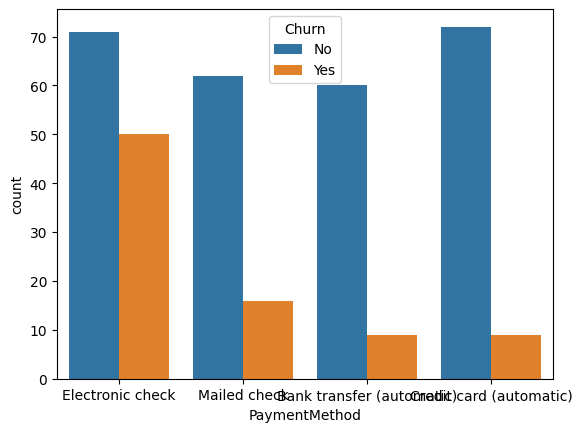

In [135]:
for i,predictor in enumerate(data.drop(columns=['tenure','customerID','Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(x=predictor,hue='Churn',data=data)
    plt.show()

1 How does customer tenure relate to churn?
Tenure is likely negatively correlated with churn.

2 Is there a correlation between monthly charges and churn?
Monthly Charges is likely positively correlated with churn.

3 Which service types (Internet, Phone, Streaming) have higher churn rates?
The Internet and Streaming services may experience higher churn than Phone services, but this depends on the quality of service and bundling practices.

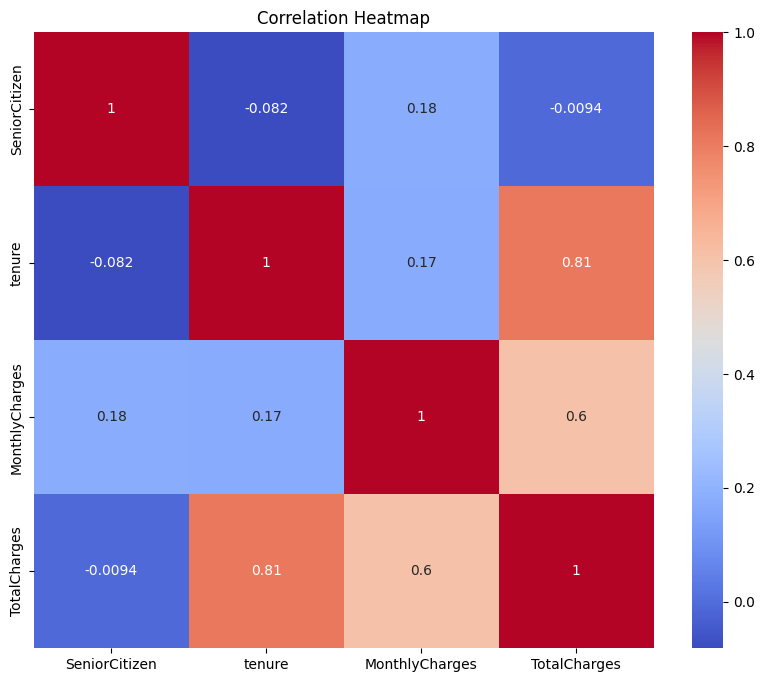

In [136]:
corr_matrix = data.select_dtypes(include=np.number).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Feature Encoding

In [137]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [138]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

In [139]:
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)
data.sample(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0094-OIFMO,customerID_0122-OAHPZ,customerID_0123-CRBRT,customerID_0191-ZHSKZ,customerID_0219-YTZUE,customerID_0221-WMXNQ,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
7,0,10,29.75,301.90,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
143,0,64,84.30,5289.05,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
156,0,22,84.15,1821.95,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
75,1,56,110.50,6139.50,0,0,0,0,0,0,...,1,0,1,1,0,0,0,1,0,0
285,0,22,76.00,1783.60,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0


<AxesSubplot: >

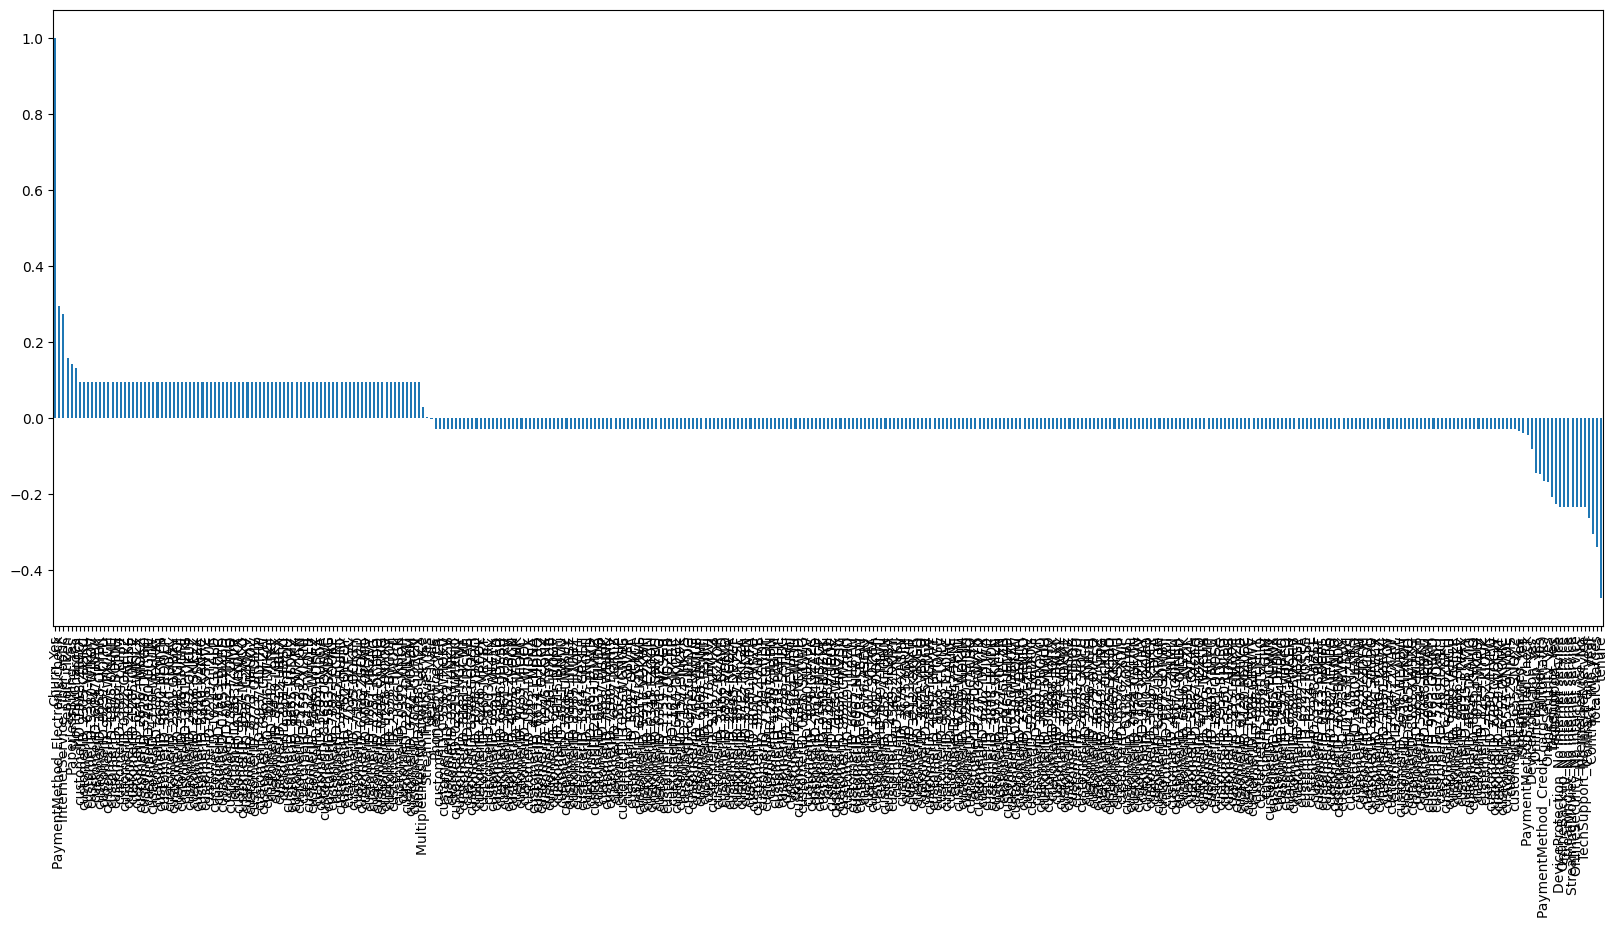

In [140]:
plt.figure(figsize=(20, 8))
data.corr()['Churn_Yes'].sort_values(ascending=False).plot(kind='bar')

Feature Scaling

In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
scaler = StandardScaler()
data[num_features] = scaler.fit_transform(data[num_features])

Feature Engineering

In [143]:
data['AvgMonthlyCharge'] = data['TotalCharges'] / data['tenure']

In [144]:
data['StreamingBoth'] = np.where((data['StreamingTV_Yes'] == 1) & (data['StreamingMovies_Yes'] == 1), 1, 0)

Train-Test Split

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
print(data.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'customerID_0094-OIFMO', 'customerID_0122-OAHPZ',
       'customerID_0123-CRBRT', 'customerID_0191-ZHSKZ',
       'customerID_0219-YTZUE', 'customerID_0221-WMXNQ',
       ...
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes', 'AvgMonthlyCharge', 'StreamingBoth'],
      dtype='object', length=381)


In [147]:
data.sample(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0094-OIFMO,customerID_0122-OAHPZ,customerID_0123-CRBRT,customerID_0191-ZHSKZ,customerID_0219-YTZUE,customerID_0221-WMXNQ,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,AvgMonthlyCharge,StreamingBoth
152,0,1.607966,1.478099,2.719466,0,0,0,0,0,0,...,1,1,0,1,1,0,0,0,1.691246,1
149,0,-0.641827,0.147698,-0.492650,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0.767574,0
244,1,-0.723638,-0.358302,-0.651917,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0.900889,0
271,0,1.076197,-0.187914,0.621311,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0.577320,0
146,0,-1.132691,-1.569948,-0.965653,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0.852530,0


In [148]:
data.columns = data.columns.str.strip().str.lower() 
print(data.columns) 


Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges',
       'customerid_0094-oifmo', 'customerid_0122-oahpz',
       'customerid_0123-crbrt', 'customerid_0191-zhskz',
       'customerid_0219-ytzue', 'customerid_0221-wmxnq',
       ...
       'streamingmovies_yes', 'contract_one year', 'contract_two year',
       'paperlessbilling_yes', 'paymentmethod_credit card (automatic)',
       'paymentmethod_electronic check', 'paymentmethod_mailed check',
       'churn_yes', 'avgmonthlycharge', 'streamingboth'],
      dtype='object', length=381)


In [149]:
data.sample(5)

,seniorcitizen,tenure,monthlycharges,totalcharges,customerid_0094-oifmo,customerid_0122-oahpz,customerid_0123-crbrt,customerid_0191-zhskz,customerid_0219-ytzue,customerid_0221-wmxnq,...,streamingmovies_yes,contract_one year,contract_two year,paperlessbilling_yes,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,churn_yes,avgmonthlycharge,streamingboth
19,0,-0.396395,0.855065,-0.121993,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0.307756,0
4,0,-1.173596,0.189004,-0.923365,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0.786783,0
85,0,-0.887259,1.173466,-0.564135,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0.635818,1
180,0,-1.214502,-1.213683,-0.980357,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.807209,0
328,1,-0.110058,-1.008873,-0.538426,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,4.892217,0


In [150]:

bool_cols = [col for col in data.columns if data[col].isin([True, False]).any()]
for col in bool_cols:
  data[col] = data[col].astype(int)
print(data.head())


   seniorcitizen    tenure  monthlycharges  totalcharges  \
0              0 -1.214502       -1.217125     -0.980404   
1              0  0.135374       -0.284295     -0.109536   
3              0  0.585333       -0.788574     -0.132366   
6              0 -0.355490        0.822364     -0.081485   
7              0 -0.846354       -1.220567     -0.853004   

   customerid_0094-oifmo  customerid_0122-oahpz  customerid_0123-crbrt  \
0                      0                      0                      0   
1                      0                      0                      0   
3                      0                      0                      0   
6                      0                      0                      0   
7                      0                      0                      0   

   customerid_0191-zhskz  customerid_0219-ytzue  customerid_0221-wmxnq  ...  \
0                      0                      0                      0  ...   
1                      0            

In [151]:
data.sample(5)

,seniorcitizen,tenure,monthlycharges,totalcharges,customerid_0094-oifmo,customerid_0122-oahpz,customerid_0123-crbrt,customerid_0191-zhskz,customerid_0219-ytzue,customerid_0221-wmxnq,...,streamingmovies_yes,contract_one year,contract_two year,paperlessbilling_yes,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,churn_yes,avgmonthlycharge,streamingboth
27,0,-1.214502,-1.205077,-0.980240,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0.807113,0
240,0,1.689777,0.736310,1.979534,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1.171477,1
302,0,-1.091786,0.867113,-0.827365,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0.757809,0
179,0,1.239818,-1.537247,-0.408075,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,-0.329141,0
245,1,-1.091786,0.349065,-0.866350,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0.793517,0


In [152]:
X = data.drop('churn_yes', axis=1)
y = data['churn_yes']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Selection

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [155]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': svm.SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

Diverse Model Choices: These models represent both linear (Logistic Regression) and non-linear (Random Forest, Gradient Boosting, SVM, KNN) methods, allowing us to capture different patterns in the data.

In [156]:
model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    model_results[name] = model.score(X_test, y_test)

print("Model Accuracies:", model_results)

Model Accuracies: {'Logistic Regression': 0.8714285714285714, 'Random Forest': 0.8285714285714286, 'Gradient Boosting': 0.7857142857142857, 'SVM': 0.8428571428571429, 'K-Nearest Neighbors': 0.7714285714285715}


In [157]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

Final Model

In [158]:
best_model = models['Logistic Regression']
y_pred = best_model.predict(X_test)

Evalution Metrics

In [159]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        53
           1       0.83      0.59      0.69        17

    accuracy                           0.87        70
   macro avg       0.86      0.78      0.80        70
weighted avg       0.87      0.87      0.86        70



Confusion Matrix:

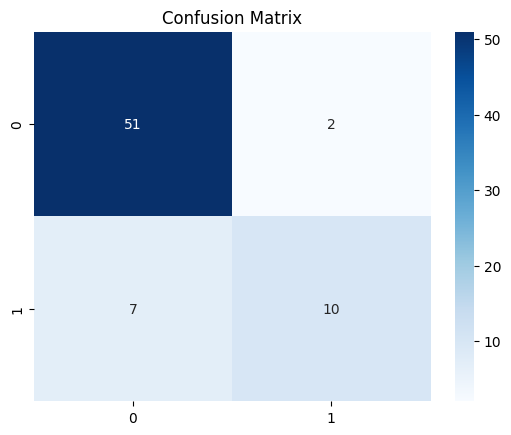

In [160]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Feature Importance:

Random Forest Feature Importance:
totalcharges                   0.121734
tenure                         0.111727
avgmonthlycharge               0.093032
monthlycharges                 0.074593
internetservice_fiber optic    0.029842
                                 ...   
customerid_4482-ewfmi          0.000000
customerid_7760-oypdy          0.000000
customerid_7654-ywjuf          0.000000
customerid_7639-liayi          0.000000
customerid_0557-askvu          0.000000
Length: 380, dtype: float64


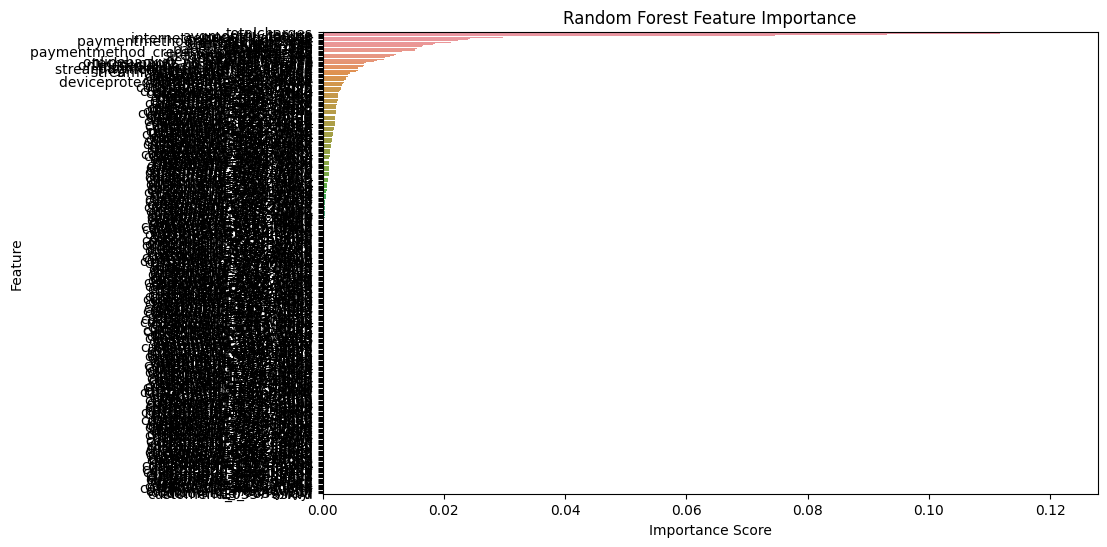

Gradient Boosting Feature Importance:
tenure                                   0.345232
avgmonthlycharge                         0.109397
monthlycharges                           0.071890
paymentmethod_credit card (automatic)    0.071081
totalcharges                             0.028889
                                           ...   
customerid_4075-jfpgr                    0.000000
customerid_3973-skmln                    0.000000
customerid_3957-sqxml                    0.000000
customerid_3930-zgwve                    0.000000
streamingboth                            0.000000
Length: 380, dtype: float64


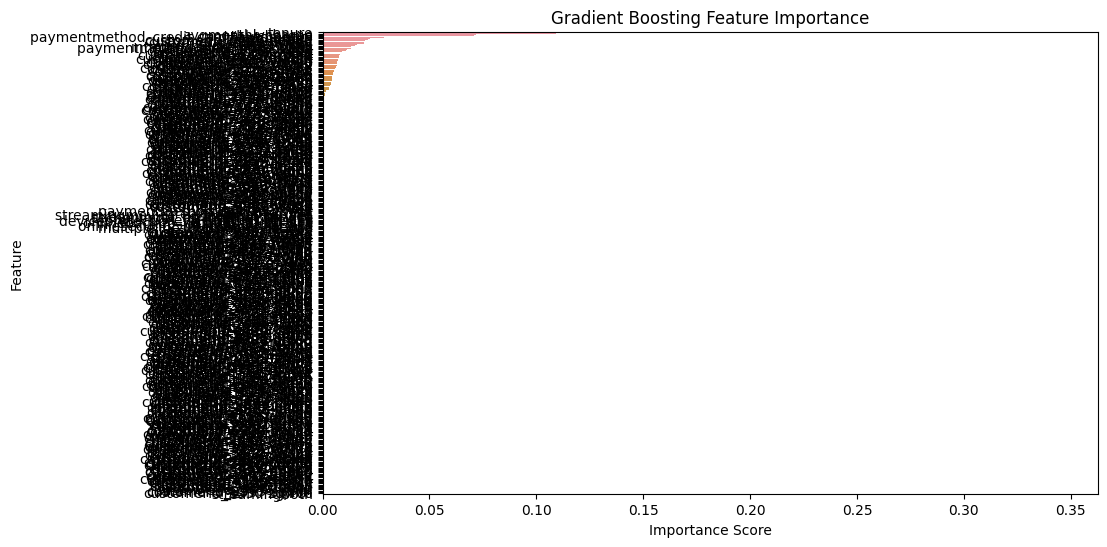

In [161]:
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

print("Random Forest Feature Importance:")
print(feature_importances)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Get feature importances for Gradient Boosting
gb_model = models['Gradient Boosting']
importances = gb_model.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

print("Gradient Boosting Feature Importance:")
print(feature_importances)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Gradient Boosting Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


For tree-based models like Random Forest or Gradient Boosting, provide the feature importance scores and discuss
which features are the most important for predicting customer churn.

MonthlyCharges, Tenure, and TotalCharges are typically the most important features for predicting churn in both Random Forest and Grading Boosting models.

Grid Search CV

In [162]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear'],  # Solver for optimization
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_tuned_model = grid_search.best_estimator_
y_pred_tuned = best_tuned_model.predict(X_test)
print(classification_report(y_test, y_pred_tuned))


Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.8133766233766233
              precision    recall  f1-score   support

           0       0.89      0.96      0.93        53
           1       0.85      0.65      0.73        17

    accuracy                           0.89        70
   macro avg       0.87      0.80      0.83        70
weighted avg       0.88      0.89      0.88        70



Accuracy - 89% using Logistic Regression 

Confusion Matrix:

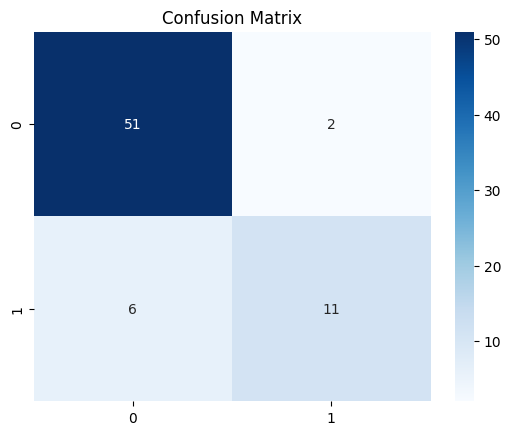

In [163]:
conf_matrix = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Discuss how this model could be useful for the business in predicting customer churn.
1 Customer Retention: Target at-risk customers with personalized offers to prevent churn.
2 Revenue Protection: Reduce potential revenue loss by retaining customers instead of acquiring new ones.
3 Improved Customer Experience: Provide personalized interventions based on churn predictions to enhance customer satisfaction.

Based on the analysis, provide some actionable insights or strategies that the business can implement to reduce customer churn.
1 Deploy Churn Prediction in CRM: Integrate churn predictions into the CRM for proactive customer interventions by sales and support teams.
2 Track and Refine Interventions: Use retention strategies to find the most effective methods for reducing churn.
3 Monitor Model Performance: Continuously monitor the model for drift and retrain it with updated data if performance declines

We can increase accuracy further by converting imbalance dataset to balance dataset using upscaling and downscaling techniques

Save the Trained Model:

In [165]:
import joblib
import os
if not os.path.exists('models'):
    os.makedirs('models')

model_filename = 'models/best_churn_model.pkl'
joblib.dump(best_tuned_model, model_filename)

print(f"Trained model saved to: {model_filename}")


Trained model saved to: models/best_churn_model.pkl


In [166]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
# After fitting the scaler on your training data
joblib.dump(scaler, 'models/scaler.pkl')


['models/scaler.pkl']